<a href="https://colab.research.google.com/github/guillermohenrion/AI/blob/master/Speech2Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import glob
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import Audio
from librosa.display import specshow


In [2]:
no_wavs = glob.glob('Llamado + Pantalla_1_6540947897336279083_1_46.wav')

In [3]:
x,sr = librosa.core.load(no_wavs[0])

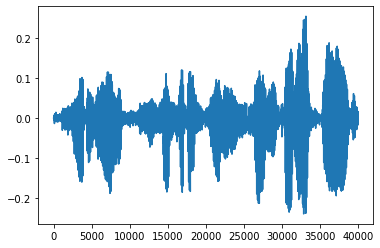

In [4]:
plt.plot(x[20000:60000])

In [5]:
Audio(x[20000:60000],rate=sr)

In [6]:
Audio(x[60000:140000],rate=sr)

In [29]:
x,sr = librosa.core.load(no_wavs[0], duration=50)
y=reduce_noise_power(x, sr)
librosa.output.write_wav('prueba.wav', y, sr)

In [22]:
Audio(y,rate=sr)
Audio(x,rate=sr)


In [27]:
import librosa
from pysndfx import AudioEffectsChain
import numpy as np
import math
import python_speech_features
import scipy as sp
from scipy import signal

def reduce_noise_power(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = round(np.median(cent))*1.5
    threshold_l = round(np.median(cent))*0.1

    less_noise = AudioEffectsChain().lowshelf(gain=-30.0, frequency=threshold_l, slope=0.8).highshelf(gain=-12.0, frequency=threshold_h, slope=0.5)
    #.limiter(gain=6.0)
    y_clean = less_noise(y)

    return y_clean


def enhance(y):
    apply_audio_effects = AudioEffectsChain().lowshelf(gain=10.0, frequency=260, slope=0.1).reverb(reverberance=25, hf_damping=5, room_scale=5, stereo_depth=50, pre_delay=20, wet_gain=0, wet_only=False)#.normalize()
    y_enhanced = apply_audio_effects(y)

    return y_enhanced


def reduce_noise_centroid_s(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = np.max(cent)
    threshold_l = np.min(cent)

    less_noise = AudioEffectsChain().lowshelf(gain=-12.0, frequency=threshold_l, slope=0.5).highshelf(gain=-12.0, frequency=threshold_h, slope=0.5).limiter(gain=6.0)

    y_cleaned = less_noise(y)

    return y_cleaned

def reduce_noise_centroid_mb(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = np.max(cent)
    threshold_l = np.min(cent)

    less_noise = AudioEffectsChain().lowshelf(gain=-30.0, frequency=threshold_l, slope=0.5).highshelf(gain=-30.0, frequency=threshold_h, slope=0.5).limiter(gain=10.0)
    # less_noise = AudioEffectsChain().lowpass(frequency=threshold_h).highpass(frequency=threshold_l)
    y_cleaned = less_noise(y)


    cent_cleaned = librosa.feature.spectral_centroid(y=y_cleaned, sr=sr)
    columns, rows = cent_cleaned.shape
    boost_h = math.floor(rows/3*2)
    boost_l = math.floor(rows/6)
    boost = math.floor(rows/3)

    # boost_bass = AudioEffectsChain().lowshelf(gain=20.0, frequency=boost, slope=0.8)
    boost_bass = AudioEffectsChain().lowshelf(gain=16.0, frequency=boost_h, slope=0.5)#.lowshelf(gain=-20.0, frequency=boost_l, slope=0.8)
    y_clean_boosted = boost_bass(y_cleaned)

    return y_clean_boosted

In [10]:
!pip install pysndfx
!pip install python_speech_features

!apt -qq install -y sox

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3
Suggested packages:
  file libsox-fmt-all
The following NEW packages will be installed:
  libmagic-mgc libmagic1 libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa
  libsox-fmt-base libsox3 sox
0 upgraded, 8 newly installed, 0 to remove and 35 not upgraded.
Need to get 760 kB of archives.
After this operation, 6,717 kB of additional disk space will be used.
Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../0-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack

In [ ]:
import librosa
from pysndfx import AudioEffectsChain
import numpy as np
import math
import python_speech_features
import scipy as sp
from scipy import signal

# http://python-speech-features.readthedocs.io/en/latest/
# https://github.com/jameslyons/python_speech_features
# http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/#deltas-and-delta-deltas


# http://dsp.stackexchange.com/search?q=noise+reduction/

'''------------------------------------
FILE READER:
    receives filename,
    returns audio time series (y) and sampling rate of y (sr)
------------------------------------'''
def read_file(file_name):
    sample_file = file_name
    sample_directory = '00_samples/'
    sample_path = sample_directory + sample_file

    # generating audio time series and a sampling rate (int)
    y, sr = librosa.load(sample_path)

    return y, sr

'''------------------------------------
NOISE REDUCTION USING POWER:
    receives an audio matrix,
    returns the matrix after gain reduction on noise
------------------------------------'''
def reduce_noise_power(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = round(np.median(cent))*1.5
    threshold_l = round(np.median(cent))*0.1

    less_noise = AudioEffectsChain().lowshelf(gain=-30.0, frequency=threshold_l, slope=0.8).highshelf(gain=-12.0, frequency=threshold_h, slope=0.5)#.limiter(gain=6.0)
    y_clean = less_noise(y)

    return y_clean


'''------------------------------------
NOISE REDUCTION USING CENTROID ANALYSIS:
    receives an audio matrix,
    returns the matrix after gain reduction on noise
------------------------------------'''

def reduce_noise_centroid_s(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = np.max(cent)
    threshold_l = np.min(cent)

    less_noise = AudioEffectsChain().lowshelf(gain=-12.0, frequency=threshold_l, slope=0.5).highshelf(gain=-12.0, frequency=threshold_h, slope=0.5).limiter(gain=6.0)

    y_cleaned = less_noise(y)

    return y_cleaned

def reduce_noise_centroid_mb(y, sr):

    cent = librosa.feature.spectral_centroid(y=y, sr=sr)

    threshold_h = np.max(cent)
    threshold_l = np.min(cent)

    less_noise = AudioEffectsChain().lowshelf(gain=-30.0, frequency=threshold_l, slope=0.5).highshelf(gain=-30.0, frequency=threshold_h, slope=0.5).limiter(gain=10.0)
    # less_noise = AudioEffectsChain().lowpass(frequency=threshold_h).highpass(frequency=threshold_l)
    y_cleaned = less_noise(y)


    cent_cleaned = librosa.feature.spectral_centroid(y=y_cleaned, sr=sr)
    columns, rows = cent_cleaned.shape
    boost_h = math.floor(rows/3*2)
    boost_l = math.floor(rows/6)
    boost = math.floor(rows/3)

    # boost_bass = AudioEffectsChain().lowshelf(gain=20.0, frequency=boost, slope=0.8)
    boost_bass = AudioEffectsChain().lowshelf(gain=16.0, frequency=boost_h, slope=0.5)#.lowshelf(gain=-20.0, frequency=boost_l, slope=0.8)
    y_clean_boosted = boost_bass(y_cleaned)

    return y_clean_boosted


'''------------------------------------
NOISE REDUCTION USING MFCC:
    receives an audio matrix,
    returns the matrix after gain reduction on noise
------------------------------------'''
def reduce_noise_mfcc_down(y, sr):

    hop_length = 512

    ## librosa
    # mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
    # librosa.mel_to_hz(mfcc)

    ## mfcc
    mfcc = python_speech_features.base.mfcc(y)
    mfcc = python_speech_features.base.logfbank(y)
    mfcc = python_speech_features.base.lifter(mfcc)

    sum_of_squares = []
    index = -1
    for r in mfcc:
        sum_of_squares.append(0)
        index = index + 1
        for n in r:
            sum_of_squares[index] = sum_of_squares[index] + n**2

    strongest_frame = sum_of_squares.index(max(sum_of_squares))
    hz = python_speech_features.base.mel2hz(mfcc[strongest_frame])

    max_hz = max(hz)
    min_hz = min(hz)

    speech_booster = AudioEffectsChain().highshelf(frequency=min_hz*(-1)*1.2, gain=-12.0, slope=0.6).limiter(gain=8.0)
    y_speach_boosted = speech_booster(y)

    return (y_speach_boosted)

def reduce_noise_mfcc_up(y, sr):

    hop_length = 512

    ## librosa
    # mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
    # librosa.mel_to_hz(mfcc)

    ## mfcc
    mfcc = python_speech_features.base.mfcc(y)
    mfcc = python_speech_features.base.logfbank(y)
    mfcc = python_speech_features.base.lifter(mfcc)

    sum_of_squares = []
    index = -1
    for r in mfcc:
        sum_of_squares.append(0)
        index = index + 1
        for n in r:
            sum_of_squares[index] = sum_of_squares[index] + n**2

    strongest_frame = sum_of_squares.index(max(sum_of_squares))
    hz = python_speech_features.base.mel2hz(mfcc[strongest_frame])

    max_hz = max(hz)
    min_hz = min(hz)

    speech_booster = AudioEffectsChain().lowshelf(frequency=min_hz*(-1), gain=12.0, slope=0.5)#.highshelf(frequency=min_hz*(-1)*1.2, gain=-12.0, slope=0.5)#.limiter(gain=8.0)
    y_speach_boosted = speech_booster(y)

    return (y_speach_boosted)

'''------------------------------------
NOISE REDUCTION USING MEDIAN:
    receives an audio matrix,
    returns the matrix after gain reduction on noise
------------------------------------'''

def reduce_noise_median(y, sr):
    y = sp.signal.medfilt(y,3)
    return (y)


'''------------------------------------
SILENCE TRIMMER:
    receives an audio matrix,
    returns an audio matrix with less silence and the amout of time that was trimmed
------------------------------------'''
def trim_silence(y):
    y_trimmed, index = librosa.effects.trim(y, top_db=20, frame_length=2, hop_length=500)
    trimmed_length = librosa.get_duration(y) - librosa.get_duration(y_trimmed)

    return y_trimmed, trimmed_length


'''------------------------------------
AUDIO ENHANCER:
    receives an audio matrix,
    returns the same matrix after audio manipulation
------------------------------------'''
def enhance(y):
    apply_audio_effects = AudioEffectsChain().lowshelf(gain=10.0, frequency=260, slope=0.1).reverb(reverberance=25, hf_damping=5, room_scale=5, stereo_depth=50, pre_delay=20, wet_gain=0, wet_only=False)#.normalize()
    y_enhanced = apply_audio_effects(y)

    return y_enhanced

'''------------------------------------
OUTPUT GENERATOR:
    receives a destination path, file name, audio matrix, and sample rate,
    generates a wav file based on input
------------------------------------'''
def output_file(destination ,filename, y, sr, ext=""):
    destination = destination + filename[:-4] + ext + '.wav'
    librosa.output.write_wav(destination, y, sr)


'''------------------------------------
LOGIC:
    [1] load file
    [2] reduce noise
    [3] trim silence
    [4] output file
sample files:
    01_counting.m4a
    02_wind_and_cars.m4a
    03_truck.m4a
    04_voices.m4a
    05_ambeint.m4a
    06_office.m4a
------------------------------------'''
samples = ['01_counting.m4a','02_wind_and_cars.m4a','03_truck.m4a','04_voices.m4a','05_ambeint.m4a','06_office.m4a']

for s in samples:
    # reading a file
    filename = s
    y, sr = read_file(filename)

    # reducing noise using db power
    y_reduced_power = reduce_noise_power(y, sr)
    y_reduced_centroid_s = reduce_noise_centroid_s(y, sr)
    y_reduced_centroid_mb = reduce_noise_centroid_mb(y, sr)
    y_reduced_mfcc_up = reduce_noise_mfcc_up(y, sr)
    y_reduced_mfcc_down = reduce_noise_mfcc_down(y, sr)
    y_reduced_median = reduce_noise_median(y, sr)

    # trimming silences
    y_reduced_power, time_trimmed = trim_silence(y_reduced_power)
    # print (time_trimmed)

    y_reduced_centroid_s, time_trimmed = trim_silence(y_reduced_centroid_s)
    # print (time_trimmed)

    y_reduced_power, time_trimmed = trim_silence(y_reduced_power)
    # print (time_trimmed)

    y_reduced_centroid_mb, time_trimmed = trim_silence(y_reduced_centroid_mb)
    # print (time_trimmed)

    y_reduced_mfcc_up, time_trimmed = trim_silence(y_reduced_mfcc_up)
    # print (time_trimmed)

    y_reduced_mfcc_down, time_trimmed = trim_silence(y_reduced_mfcc_down)
    # print (time_trimmed)

    y_reduced_median, time_trimmed = trim_silence(y_reduced_median)

    # generating output file [1]
    output_file('01_samples_trimmed_noise_reduced/' ,filename, y_reduced_power, sr, '_pwr')
    output_file('01_samples_trimmed_noise_reduced/' ,filename, y_reduced_centroid_s, sr, '_ctr_s')
    output_file('01_samples_trimmed_noise_reduced/' ,filename, y_reduced_centroid_mb, sr, '_ctr_mb')
    output_file('01_samples_trimmed_noise_reduced/' ,filename, y_reduced_mfcc_up, sr, '_mfcc_up')
    output_file('01_samples_trimmed_noise_reduced/' ,filename, y_reduced_mfcc_down, sr, '_mfcc_down')
    output_file('01_samples_trimmed_noise_reduced/' ,filename, y_reduced_median, sr, '_median')
    output_file('01_samples_trimmed_noise_reduced/' ,filename, y, sr, '_org')

Usando el speech to text de Google

 Buenos días, señorita Mi nombre es Melina en qué lo puedo ayudar a bloquear la última porque no puedo descargar el resumen jornada la centralización y se selecciona la tarjeta y no aparece la tarjeta sigue la tarjeta se encuentra inhabilitada por el regular y Hades en Los Cabos el resumen que vence el 14 de marzo no registró ningún pago el otro día me llamaron del banco para el total y todo de una vez que impacte.